In [14]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

california_housing_df = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv',sep=',')
california_housing_df = california_housing_df.reindex(
    np.random.permutation(california_housing_df.index))

california_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9470,-119.27,35.50,21.0,2171.0,483.0,1315.0,450.0,1.7105,52100.0
14229,-122.08,37.41,20.0,1896.0,456.0,1069.0,436.0,4.6875,288900.0
2090,-117.34,33.89,17.0,2678.0,394.0,1225.0,367.0,5.3630,211300.0
15724,-122.40,37.81,12.0,1349.0,349.0,536.0,334.0,7.7852,250000.0
11684,-121.30,38.60,32.0,9534.0,1819.0,4951.0,1710.0,3.3926,103400.0
7080,-118.32,34.06,43.0,2808.0,584.0,1654.0,569.0,4.1250,436800.0
10859,-120.81,38.67,14.0,8396.0,1578.0,3952.0,1474.0,3.0565,118800.0
12388,-121.55,38.55,10.0,6227.0,1164.0,2909.0,1077.0,4.1060,115900.0
3677,-117.92,33.72,17.0,3318.0,502.0,1520.0,498.0,5.5501,274200.0
8849,-118.73,34.29,8.0,4983.0,754.0,2510.0,725.0,6.9454,276500.0


In [15]:
def preprocess_features(california_housing_df):
    #prepare input features from California housing dataset
    
    selected_features = california_housing_df[ 
        ['latitude',
         'longitude',
         'housing_median_age',
         'total_rooms',
         'total_bedrooms',
         'population',
         'households',
         'median_income'] ]
    processed_features = selected_features.copy()
    #Create a synthetic feature
    processed_features['rooms_per_person'] = california_housing_df['total_rooms'] / california_housing_df['population']
    return processed_features

In [16]:
def preprocess_targets(california_housing_df):
    #prepare target features from California housing dataset
    
    output_targets = pd.DataFrame()
    output_targets['median_house_value'] = california_housing_df['median_house_value']/1000.0
    return output_targets

In [17]:
training_examples = preprocess_features(california_housing_df.head(12000))
training_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,35.646782,-119.577007,28.516917,2655.562083,541.824250,1434.191000,503.574833,3.879386,1.983580
std,2.144212,1.998313,12.574745,2201.906482,425.052884,1173.564647,389.021119,1.913188,1.193758
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.018065
25%,33.940000,-121.780000,18.000000,1465.000000,298.000000,794.000000,283.000000,2.564225,1.522598
50%,34.260000,-118.520000,29.000000,2144.000000,438.000000,1176.000000,412.000000,3.535700,1.947115
75%,37.720000,-118.010000,37.000000,3167.000000,652.000000,1720.000000,608.000000,4.770800,2.299310
max,41.950000,-114.310000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,55.222222


In [18]:
training_targets = preprocess_targets(california_housing_df.head(12000))
training_targets.describe()

,median_house_value
count,12000.000000
mean,207.142489
std,115.993215
min,14.999000
25%,119.000000
50%,180.050000
75%,265.000000
max,500.001000


In [19]:
validation_examples = preprocess_features(california_housing_df.tail(5000))
validation_targets = preprocess_targets(california_housing_df.tail(5000))
validation_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35.573486,-119.526352,28.763200,2615.110000,533.618600,1418.493000,495.575000,3.893639,1.974633
std,2.120075,2.021274,12.615711,2126.264937,412.830893,1083.692357,373.476809,1.896179,1.108055
min,32.550000,-124.300000,1.000000,11.000000,3.000000,8.000000,4.000000,0.499900,0.135721
25%,33.920000,-121.800000,18.000000,1450.750000,294.000000,776.750000,278.000000,2.576350,1.520430
50%,34.215000,-118.450000,29.000000,2089.500000,424.000000,1150.000000,400.000000,3.561800,1.929589
75%,37.690000,-117.980000,37.000000,3109.250000,642.000000,1721.000000,594.000000,4.760525,2.295488
max,41.860000,-114.470000,52.000000,32054.000000,5290.000000,15507.000000,5050.000000,15.000100,41.333333


In [20]:
validation_targets.describe()

,median_house_value
count,5000.000000
mean,207.681128
std,115.971797
min,22.500000
25%,120.800000
50%,180.650000
75%,265.025000
max,500.001000


Plot Latitude/Longitude vs median house value

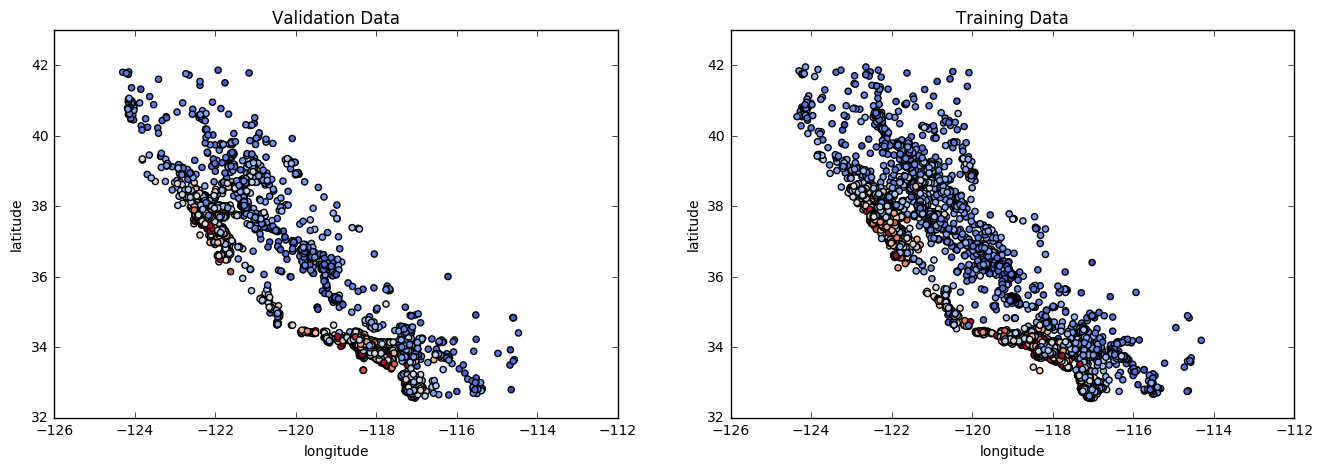

In [21]:
plt.figure(figsize=(16,5))

ax = plt.subplot(1,2,1)
ax.set_title('Validation Data')

ax.set_autoscaley_on(False)
ax.set_ylim([32,43])
ax.set_ylabel('latitude')
ax.set_autoscalex_on(False)
ax.set_xlim([-126,-112])
ax.set_xlabel('longitude')
plt.scatter(validation_examples['longitude'],
            validation_examples['latitude'],
            cmap='coolwarm',
            c=validation_targets['median_house_value'] / validation_targets['median_house_value'].max())

ax =plt.subplot(1,2,2)
ax.set_title('Training Data')

ax.set_autoscaley_on(False)
ax.set_ylim([32,43])
ax.set_ylabel('latitude')
ax.set_autoscalex_on(False)
ax.set_xlim([-126,-112])
ax.set_xlabel('longitude')
plt.scatter(training_examples['longitude'],
            training_examples['latitude'],
            cmap='coolwarm',
            c=training_targets['median_house_value'] / training_targets['median_house_value'].max())
# plt.plot()
plt.show()

Train and Evaluate a Model

In [23]:
def my_input_function(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #Train a linear regression model of multiple features
    
    #Convert pandas data into a dict of np arrays
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #Construct a dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #Shuffle the data of specified
    if shuffle:
        ds = ds.shuffle(10000)
    
    #Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [24]:
#Working on multiple features, configuring feature columns into a separate function
def construct_feature_columns(input_features):
    #Construct the tensorflow feature columns
    return set([tf.feature_column.numeric_column(my_feature)
                for my_feature in input_features])

In [29]:
def train_model(learning_rate, steps, batch_size, training_examples, training_targets, validation_examples, validation_targets):
    #Train a linear regression model of multiple features
    
    periods = 10
    steps_per_period = steps/periods
    
    #Create a linear regressor object
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=my_optimizer)
    
    #Create input function
    training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value'], batch_size=batch_size)
    predict_training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value'], shuffle=False, num_epochs=1)
    predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value'], shuffle=False, num_epochs=1)
    
    #Train the model, loop and see periodically assess loss metrics
    print('Training model....')
    print('RMSE training data: ')
    
    training_rmse = []
    validation_rmse = []
    for period in range(0, periods):
        #Train the model, starting from prior state
        linear_regressor.train(input_fn=training_input_function, steps=steps_per_period)
        
        #Compute predictions
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_function)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_function)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
        
        #Compute training and validation loss
        training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions, validation_targets))
        
        #Print the current loss
        print(' period %02d: %0.2f' % (period, training_root_mean_squared_error))
        
        #Add the loss metrics from this period to our list
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print('Model training finished!!!')
    
    
    #Output a graph of loss metrics over periods
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title('RMSE vs Periods')
    plt.tight_layout()
    plt.plot(training_rmse, label='training')
    plt.plot(validation_rmse, label='validation')
    plt.legend()
    plt.show()
    
    return linear_regressor
    

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_is_chief': True, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpvjtsmckg', '_task_type': 'worker', '_save_checkpoints_secs': 600, '_session_config': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002306D4EC588>, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_master': '', '_service': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100}
Training model....
RMSE training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpvjtsmckg\model.ckpt.
INFO:tensorflow:loss = 52029.613, step = 1
INFO:tensorflow:Saving checkpoints for 10 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpvjtsmckg\model.ckpt.
INFO:tensorflow:Loss for final step: 

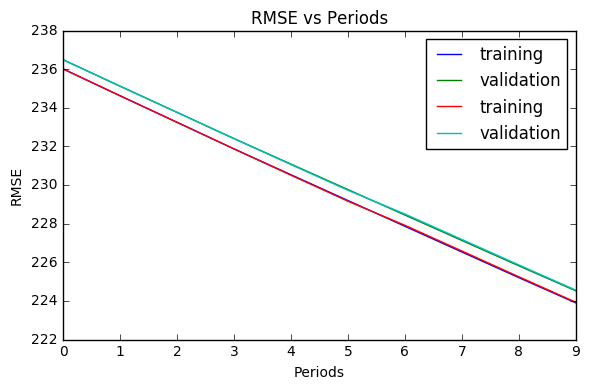

In [30]:
linear_regressor = train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Evaluate on Test data

In [33]:
california_housing_test_data = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_test.csv',sep=',')

test_examples = preprocess_features(california_housing_test_data)
test_targets = preprocess_targets(california_housing_test_data)

predict_test_input_function = lambda: my_input_function(test_examples, test_targets['median_house_value'], num_epochs=1, shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_function)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt(metrics.mean_squared_error(test_predictions, test_targets))

print('Final RMSE on test data: %0.2f' % root_mean_squared_error)

INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmpvjtsmckg\model.ckpt-100
Final RMSE on test data: 221.43
